# **Pandas**

Pythonun exceli denebilir.
Numpy ve matlib ile birlikte kullanılır.

Numpy tek veri türü ile çalışırken pandas çok türlü veri türü ile çalışır.

Tek boyutlu veriler Series olarak

İki boyutlu veriler isse DataFrame olarak adlandırılır.


In [144]:
#Pandas kütüphanesi yükleme

import pandas as pd
import numpy as np


In [145]:
# Pandas veri okuma metodu. excel csv spss verilerini okumak için

modely = pd.read_excel("model_y_sales_data_turkey.xlsx")

# **Series**
Bir boyutlu nesnelerdir ve bir sütunu ifade eder.
İçerisine birden farklı veri türünü alabilir. Object veri türü string değer türüne benzer. Veriler 0 dan başlayarak sıralanır.

In [146]:
veri = pd.Series([3,'iki',True,5.3])
veri

,0
0,3
1,iki
2,True
3,5.3


In [147]:
#İndex e göre elemanı çağırmak için
veri[2]

True

In [148]:
#Array dizisi olarak almak için
veri.values


array([3, 'iki', True, 5.3], dtype=object)

In [149]:
#Dizideki elemanların sayısını öğrenmek için
veri.value_counts()

,count
3,1
iki,1
True,1
5.3,1


In [150]:
#Toplam dizinin eleman sayısını bulmak için
veri.value_counts().sum()

np.int64(4)

In [151]:
#Diziye index atamak için aşağıdaki metot kullanılabilir. Sayıların eşit olmasına dikkat edilmeli.

yeni_veri = pd.Series([3,'iki',True,5.3], index = ['a','b','c','d'])
yeni_veri

,0
a,3
b,iki
c,True
d,5.3


In [152]:
#Oluşan seriye isim vermek için
yeni_veri = pd.Series([3,'iki',True,5.3], index = ['a','b','c','d'], name="Tablo İsmi")
yeni_veri

,Tablo İsmi
a,3
b,iki
c,True
d,5.3


In [153]:
#Oluşturulan indexten veri çağırmak için

yeni_veri["b"]

'iki'

In [154]:
#liste ,tuple ve sözlük veri tipini Series veri tipine çevirebilriliz.

puan = {'Ali': 30, 'Mehmet': 55, 'Berin':95}

pd_puan = pd.Series(puan)
pd_puan

,0
Ali,30
Mehmet,55
Berin,95


In [155]:
#Series tan sonuç np.int64 tipinde çıktı verir.
pd_puan["Mehmet"]

np.int64(55)

In [156]:
#Birden fazla satırı seçmek istersek

pd_puan[["Ali","Berin"]]

,0
Ali,30
Berin,95


In [157]:
#Yada belli bir filtreye göre seçmek istersek

pd_puan[pd_puan > 50]

,0
Mehmet,55
Berin,95


In [158]:
#Filtelemeyi tablo üzerinde yapmak ve sonucu True False olarak almak için

pd_puan > 50

,0
Ali,False
Mehmet,True
Berin,True


In [159]:
#Seri içindeki bir elemanı değiştirmek istersek

pd_puan["Mehmet"] = 100
pd_puan

,0
Ali,30
Mehmet,100
Berin,95


In [160]:
#Değiştirilen değer türü aynı olmak zorunda değil.
pd_puan[pd_puan < 50] = "Kaldı"
pd_puan

/tmp/ipython-input-992076062.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Kaldı' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  pd_puan[pd_puan < 50] = "Kaldı"


,0
Ali,Kaldı
Mehmet,100
Berin,95


In [161]:
#Herhangi bir değerin veride olup olmadığını öğrenmek amacıyla. Sonuç bool değer olur True Evet anlamındadır.

"Berin" in pd_puan

True

In [162]:
#Seri üzerinde matematiksel işlemler yapabiliriz.

int_puan = pd.Series([30,55,95], index = ["Ali","Mehmet","Berin"])
int_puan /10


,0
Ali,3.0
Mehmet,5.5
Berin,9.5


In [163]:
#serinin karesini almak için

int_puan**2

,0
Ali,900
Mehmet,3025
Berin,9025


In [164]:
#Eksik veriyi bulmak için

modely.isnull().sum()

,0
model_details,0
year,0
km,0
colors,0
prices,0
dates,0
citys,0


In [165]:
#Veri tablosununda ilk beş verinin bilgilerini görmek için. parantez içine yazılan sayı kadar da gösterir örn head(2) 2 satır gösterir.

modely.head()

,model_details,year,km,colors,prices,dates,citys
0,Premium (Juniper),2025,6001,Füme,2950000,2026-02-08,İstanbul
1,RWD (Legacy),2024,25000,Mavi,2245000,2026-02-08,Kocaeli
2,Premium (Juniper),2025,6001,Siyah,2975000,2026-02-08,Ankara
3,Performance (Legacy),2023,67000,Bej,2215000,2026-02-08,İstanbul
4,Long Range (Legacy),2023,32811,Beyaz,2225000,2026-02-08,İzmir


In [166]:
#sondan 5 satırı görüntülemek için. tail(2) son iki satırı gösterir.
modely.tail()

,model_details,year,km,colors,prices,dates,citys
993,Premium (Juniper),2025,8500,Beyaz,2750000,2026-01-19,Ankara
994,Long Range (Legacy),2023,34500,Beyaz,2380000,2026-01-19,Ankara
995,RWD (Juniper),2025,7750,Siyah,2950000,2026-01-18,Kocaeli
996,Long Range (Legacy),2023,22850,Beyaz,2600000,2026-01-18,İstanbul
997,Long Range (Legacy),2023,59500,Gümüş Gri,2385000,2026-01-18,Afyonkarahisar


In [167]:
#Verinin satır ve sütun sayısını öğrenmek amacıyla
modely.shape

(998, 7)

In [168]:
#Veride bulunan değerlerin tipini öğrenmek için dtypes atribütü kullanılır
modely.model_details.dtypes

dtype('O')

In [169]:
#Seriye ait betimsel istatistiki bilgileri öğrenmek için desciribe() metodu kullanılır. top en fazla tekrar eden değeri
#freg de onun tekrar etme sayısını verir.

modely.model_details.describe()

,model_details
count,998
unique,8
top,Premium (Juniper)
freq,246


In [170]:
#Sayısal tipte olan bir değişken için desciribe() fonksiyonu
modely.km.describe()

,km
count,998.000000
mean,24597.902806
std,22685.683688
min,0.000000
25%,7973.750000
50%,15275.000000
75%,34000.000000
max,143000.000000


In [171]:
#Her bir değerin yüzdelik olarak dağılımını görmek istersek

modely.citys.unique()

array(['İstanbul ', 'Kocaeli ', 'Ankara ', 'İzmir ', 'Konya ',
       'Eskişehir ', 'Balıkesir ', 'Trabzon ', 'Gaziantep ', 'Bursa ',
       'Antalya ', 'Mersin ', 'Aydın ', 'Manisa ', 'Aksaray ', 'Malatya ',
       'Erzurum ', 'Afyonkarahisar ', 'Denizli ', 'Sivas ', 'Kırklareli ',
       'Adana ', 'Kayseri ', 'Samsun ', 'Isparta ', 'Erzincan ',
       'Giresun ', 'Edirne ', 'Tokat ', 'Çorum ', 'Ordu ', 'Diyarbakır ',
       'Hatay ', 'Muğla ', 'Kahramanmaraş ', 'Elazığ ', 'Kütahya ',
       'Niğde ', 'Amasya ', 'Düzce ', 'Bolu ', 'Sakarya ', 'Uşak ',
       'Zonguldak ', 'Kırıkkale ', 'Rize ', 'Tekirdağ ', 'Bilecik ',
       'Yozgat ', 'Yalova ', 'Çanakkale ', 'Bartın ', 'Sinop ',
       'Nevşehir ', 'Van ', 'Burdur ', 'Bitlis '], dtype=object)

In [172]:
#Tip sorgulama fonksiyonumuz type() dır

type(modely.km)

pandas.core.series.Series

In [173]:
#Benzersiz değerleri görmek için unique() metodu kullanılır. Sonuç np.array dizisi

modely.model_details.unique()

array(['Premium (Juniper)', 'RWD (Legacy)', 'Performance (Legacy)',
       'Long Range (Legacy)', 'RWD (Juniper)', 'Standart (Juniper)',
       'Long Range (Juniper)', 'Performance (Juniper)'], dtype=object)

In [174]:
#Benzersiz değerin kaç tane olduğunu görmek istersek nunique() metodu kullanılır.
modely.model_details.nunique()

8

In [175]:
#Çapraz tablo oluşturmak istersek

pd.crosstab(modely.model_details,modely.year)

year,2021,2022,2023,2024,2025
model_details,,,,,
Long Range (Juniper),0,0,0,0,11
Long Range (Legacy),1,1,137,0,1
Performance (Juniper),0,0,0,0,2
Performance (Legacy),0,4,117,0,0
Premium (Juniper),0,0,0,0,246
RWD (Juniper),0,0,0,3,58
RWD (Legacy),0,0,0,179,50
Standart (Juniper),0,0,0,0,188


In [176]:
pd.crosstab(modely.model_details,modely.year)

year,2021,2022,2023,2024,2025
model_details,,,,,
Long Range (Juniper),0,0,0,0,11
Long Range (Legacy),1,1,137,0,1
Performance (Juniper),0,0,0,0,2
Performance (Legacy),0,4,117,0,0
Premium (Juniper),0,0,0,0,246
RWD (Juniper),0,0,0,3,58
RWD (Legacy),0,0,0,179,50
Standart (Juniper),0,0,0,0,188


In [177]:
#Bir sayısal serinin direk ortamalasını almak istersek

modely.km.mean()

np.float64(24597.902805611222)

<Axes: ylabel='Frequency'>

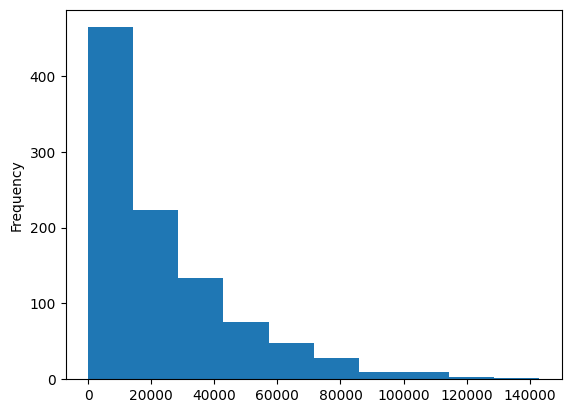

In [178]:
#basit görselleştirmeler yapmak için sayısal olmayan değişkenler için hist
%matplotlib inline
modely.km.plot(kind="hist")

<Axes: ylabel='count'>

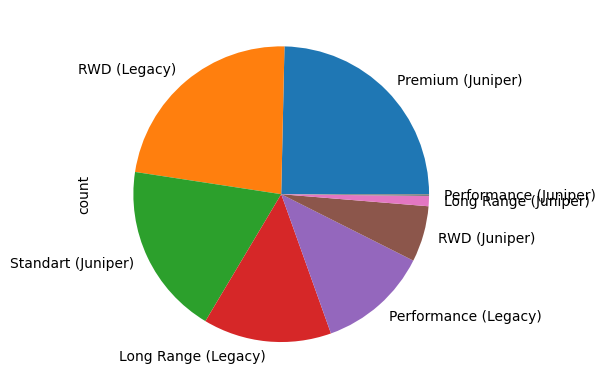

In [179]:
modely.model_details.value_counts().plot(kind='pie')


<Axes: xlabel='model_details'>

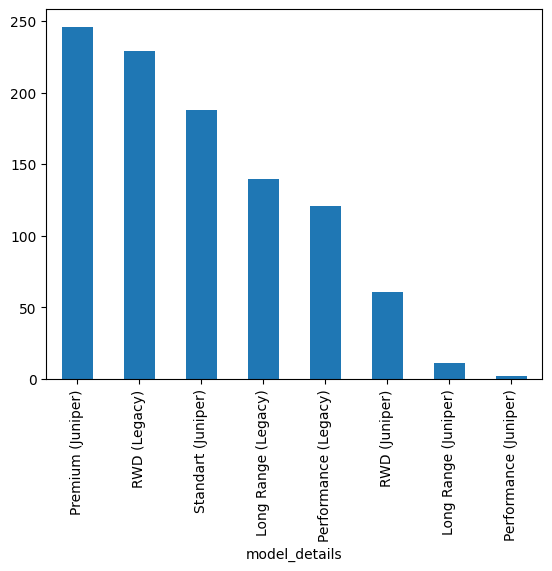

In [180]:
modely.model_details.value_counts().plot(kind="bar")

<Axes: >

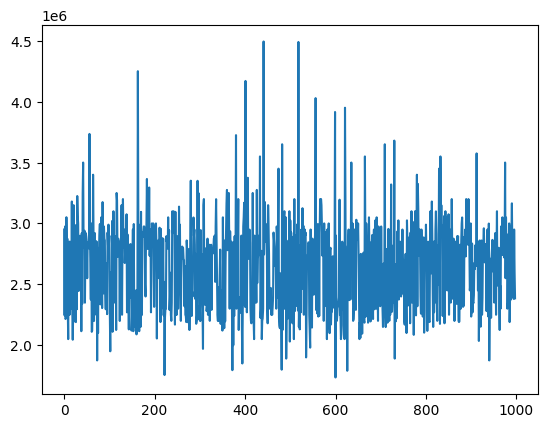

In [181]:
modely.prices.plot()

# **DataFrame **

2 boyutlu veri yapısıdır. Her bir sütunda aynı veri tipini tutan diktörtgen tipi yapıdır.



In [182]:
type(modely)

pandas.core.frame.DataFrame

In [183]:
modely.head()

,model_details,year,km,colors,prices,dates,citys
0,Premium (Juniper),2025,6001,Füme,2950000,2026-02-08,İstanbul
1,RWD (Legacy),2024,25000,Mavi,2245000,2026-02-08,Kocaeli
2,Premium (Juniper),2025,6001,Siyah,2975000,2026-02-08,Ankara
3,Performance (Legacy),2023,67000,Bej,2215000,2026-02-08,İstanbul
4,Long Range (Legacy),2023,32811,Beyaz,2225000,2026-02-08,İzmir


In [184]:
modely.tail(2)

,model_details,year,km,colors,prices,dates,citys
996,Long Range (Legacy),2023,22850,Beyaz,2600000,2026-01-18,İstanbul
997,Long Range (Legacy),2023,59500,Gümüş Gri,2385000,2026-01-18,Afyonkarahisar


In [185]:
#Satır ve sütun sayısını öğrenmek için

modely.shape

(998, 7)

In [186]:
#Değişken isimlerine , tipine ,ve boş değer bilgilerine birlikte erişmek için
modely.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   model_details  998 non-null    object        
 1   year           998 non-null    int64         
 2   km             998 non-null    int64         
 3   colors         998 non-null    object        
 4   prices         998 non-null    int64         
 5   dates          998 non-null    datetime64[ns]
 6   citys          998 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 54.7+ KB


In [187]:
#Sütun adlarını
modely.columns

Index(['model_details', 'year', 'km', 'colors', 'prices', 'dates', 'citys'], dtype='object')

In [188]:
#index bilgilerine erişmek için
modely.index

RangeIndex(start=0, stop=998, step=1)

In [189]:
#hangi sütunda kaç tane boş değer var görmek için
pd.isnull(modely).sum()

,0
model_details,0
year,0
km,0
colors,0
prices,0
dates,0
citys,0


In [190]:
#Sözlük veri yapısını dataframe veri yapısına çevirmek için

veri = { 'isim':["Mehmet","Özlem", "Berin"],
        'cinsiyet': ["Erkek","Kadın","Kadın"],
        'yaş': [40,39,12]}

pd_veri = pd.DataFrame(veri)
pd_veri

,isim,cinsiyet,yaş
0,Mehmet,Erkek,40
1,Özlem,Kadın,39
2,Berin,Kadın,12


In [191]:
#Sütun isim sıralamasını değiştirmek istersek

pd_veri = pd.DataFrame(veri, columns=["isim","yaş","cinsiyet"])
pd_veri

,isim,yaş,cinsiyet
0,Mehmet,40,Erkek
1,Özlem,39,Kadın
2,Berin,12,Kadın


In [192]:
#Sözlükte olmayan veri türünü eklersek o sütun NaN yani boş veri olarak görülür.
pd_veri = pd.DataFrame(veri, columns=["isim","yaş","cinsiyet","sınıf"])
pd_veri




,isim,yaş,cinsiyet,sınıf
0,Mehmet,40,Erkek,NaN
1,Özlem,39,Kadın,NaN
2,Berin,12,Kadın,NaN


In [193]:
#indekslere yeni etiket atamak istersek
pd_veri= pd.DataFrame(veri, columns=["isim","yaş","cinsiyet","sınıf"], index=["Bir","İki","Üç"])
pd_veri

,isim,yaş,cinsiyet,sınıf
Bir,Mehmet,40,Erkek,NaN
İki,Özlem,39,Kadın,NaN
Üç,Berin,12,Kadın,NaN


In [194]:
#Birden fazla sütunu seçmek için
pd_veri[["isim","yaş"]]

,isim,yaş
Bir,Mehmet,40
İki,Özlem,39
Üç,Berin,12


In [195]:
#İstediğimi sütunu . diyerekte çağırabiliyorum mesela pd_veri["isim"] i

pd_veri.isim

,isim
Bir,Mehmet
İki,Özlem
Üç,Berin


In [196]:
#belli bir satırı çağırmak için ise
pd_veri.loc["Bir"]

,Bir
isim,Mehmet
yaş,40
cinsiyet,Erkek
sınıf,NaN


In [197]:
#indeks sayısına göre çağırmak istersek
pd_veri.iloc[0]

,Bir
isim,Mehmet
yaş,40
cinsiyet,Erkek
sınıf,NaN


In [198]:
#istenen yere bir değer atamak için
pd_veri.iloc[0,2] = "Erkek1"
pd_veri

,isim,yaş,cinsiyet,sınıf
Bir,Mehmet,40,Erkek1,NaN
İki,Özlem,39,Kadın,NaN
Üç,Berin,12,Kadın,NaN


In [199]:
#Bir sütuna değer atamak
pd_veri["sınıf"] = 12
pd_veri

,isim,yaş,cinsiyet,sınıf
Bir,Mehmet,40,Erkek1,12
İki,Özlem,39,Kadın,12
Üç,Berin,12,Kadın,12


In [200]:
#Eğer bir dataframe içerisinde bir sutunu seçip sadece ond aşartlı işlem yapmak istersek
pd_veri.sınıf[pd_veri.sınıf==12] = "Son Sınıf"
pd_veri

/tmp/ipython-input-3924294119.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  pd_veri.sınıf[pd_veri.sınıf==12] = "Son Sınıf"
/tmp/ipython-input-3924294119.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

,isim,yaş,cinsiyet,sınıf
Bir,Mehmet,40,Erkek1,Son Sınıf
İki,Özlem,39,Kadın,Son Sınıf
Üç,Berin,12,Kadın,Son Sınıf


In [201]:
#Dataya yeni bir sütun eklemk için

borc = [1,0,0]

pd_veri["borc"] = borc

pd_veri

,isim,yaş,cinsiyet,sınıf,borc
Bir,Mehmet,40,Erkek1,Son Sınıf,1
İki,Özlem,39,Kadın,Son Sınıf,0
Üç,Berin,12,Kadın,Son Sınıf,0


In [202]:
#bir sütundan bilgi alarak yeni bir sütun oluşturmak için

pd_veri["Mesaj Gönder"] = pd_veri.borc == 1
pd_veri

,isim,yaş,cinsiyet,sınıf,borc,Mesaj Gönder
Bir,Mehmet,40,Erkek1,Son Sınıf,1,True
İki,Özlem,39,Kadın,Son Sınıf,0,False
Üç,Berin,12,Kadın,Son Sınıf,0,False


In [203]:
#Sütun Silmek için del() metodu kullanılır

del pd_veri["Mesaj Gönder"]
pd_veri

,isim,yaş,cinsiyet,sınıf,borc
Bir,Mehmet,40,Erkek1,Son Sınıf,1
İki,Özlem,39,Kadın,Son Sınıf,0
Üç,Berin,12,Kadın,Son Sınıf,0


In [204]:
#Sözlük içinde sözlük yapısı ile dataframe oluşturmak için

karne = {'Türkçe':{'Mehmet':80,'Berin':90, 'Özlem':100},
         'Matematik':{'Mehmet':90,'Berin':100, 'Özlem':80},
         'Fen':{'Mehmet':100,'Berin':100, 'Özlem':0},
         }

In [205]:
#Sözlükten istersek sütun ve index sırasını seçerek bir dataframe oluşturduk.
pd_karne = pd.DataFrame(karne,columns=["Fen","Matematik","Türkçe"],index=["Berin","Mehmet","Özlem"])
pd_karne

,Fen,Matematik,Türkçe
Berin,100,100,90
Mehmet,100,90,80
Özlem,0,80,100


In [206]:
#Satır ve Sütun yeri değiştirmek için Transpose etmek için

pd_karne.T


,Berin,Mehmet,Özlem
Fen,100,100,0
Matematik,100,90,80
Türkçe,90,80,100


In [207]:
#Satır ve sütunlara isim vermek için

pd_karne.index.name = "Öğrenci Adı"
pd_karne.columns.name = 'Ders Adı'

pd_karne

Ders Adı,Fen,Matematik,Türkçe
Öğrenci Adı,,,
Berin,100,100,90
Mehmet,100,90,80
Özlem,0,80,100


In [208]:
#values ile dataframe iki boyutlu dizi yapısına dönüşür
pd_karne.values

array([[100, 100,  90],
       [100,  90,  80],
       [  0,  80, 100]])

In [209]:
#indeksi değiştirilemez yapmak için onu bir değişkene atıyoruz.

indeks =pd_karne.index



# **Pandas Önemli Metotlar**

In [210]:
s1 = pd.Series([1,2,3,4], index = ['a','b','c','d'])

s1["b"]

np.int64(2)

In [211]:
#mevcut serinin indexleri değiştirilmiş yeni hali için, olmayan karşılığa nan yazar.

s2 =s1.reindex(index = ['b','c','a','d','e'])
s2


,0
b,2.0
c,3.0
a,1.0
d,4.0
e,NaN


In [212]:
#Boş değerleri istediğimiz bir değerle fiil_value metoduyla doldurabiliriz
s3 = s1.reindex(index = ['b','c','a','d','e'], fill_value=0)
s3

,0
b,2
c,3
a,1
d,4
e,0


In [213]:
#Arada silininen satırlar olmuş varsayalım bunları doldurmak için
s3 = pd.Series([1,5,7], index= [1,3,8])
s3

,0
1,1
3,5
8,7


In [214]:
#Kendinden sonraki boş index e dolana kadar kendi değerini atar. yoksa nan atar. bu nan ı fill_value metoduysa istediğimiz gibi olduruabiliriz.
s4=s3.reindex(range(9), method="ffill")
s4

,0
0,NaN
1,1.0
2,1.0
3,5.0
4,5.0
5,5.0
6,5.0
7,5.0
8,7.0


In [215]:
#DataFrame içinde satır ve sütunlar içinde reindex özelliği kullanılabilir.
df = pd.DataFrame(np.arange(9).reshape(3,3),index=[1,2,3],columns=['A','B','C'])
df


,A,B,C
1,0,1,2
2,3,4,5
3,6,7,8


In [216]:
#Satır ve sütun sıralaması ile oynayıp yeni satır ve sütunda ekleyebiliriz.
df1 =df.reindex(index=[2,3,1], columns=['B','C','A'])
df1

,B,C,A
2,4,5,3
3,7,8,6
1,1,2,0


In [217]:
#loc metoduysa istediğimiz satırı çağırabiliriz yada yeniden indexleme yapabiliriz.

df.loc[1]

,1
A,0
B,1
C,2


In [218]:
#reindex gibi sıralamak için
df.loc[[3,1,2]]

,A,B,C
3,6,7,8
1,0,1,2
2,3,4,5


In [219]:
#İstersek indek etiketi değilde index sırası ile de çağırabiliriz.

df.iloc[0]

,1
A,0
B,1
C,2


In [220]:
df.iloc[[2,0,1]]

,A,B,C
3,6,7,8
1,0,1,2
2,3,4,5


In [221]:
#drop metodu ile istenilen satırı silmek için

df2= df.drop(3)
df2

,A,B,C
1,0,1,2
2,3,4,5


In [222]:
#Birden fazla satır silmek istersek liste içine yazıyoruz.

df2= df.drop([3,1])
df2

,A,B,C
2,3,4,5


In [223]:
#drop fonksiyonu ile istenilen sütunu silmek için axis 1 ile sütun axis 0 ile satırlar için işlem yapılır

df2 = df.drop('A',axis=1)
df2

,B,C
1,1,2
2,4,5
3,7,8


In [224]:
#Birden fazla sürun silmek isteseydin

df2 = df.drop(['A','C'], axis=1)
df2

,B
1,1
2,4
3,7


In [225]:
#Sütunların ortalaması görmek için

df.mean()

,0
A,3.0
B,4.0
C,5.0


In [226]:
#Satırların ortalamalarını görmek için

df.mean(axis=1)

,0
1,1.0
2,4.0
3,7.0


# **Aritmetik İşlemler**

In [227]:
s1 = pd.Series(np.arange(4),index=[2,3,1,4])
s2 = pd.Series(np.arange(5),index=[1,2,3,4,5])


In [228]:
s1

,0
2,0
3,1
1,2
4,3


In [229]:
s2

,0
1,0
2,1
3,2
4,3
5,4


In [230]:
#Ortak indexlerin karşısında ne varsa onu bulur toplar, birinde var diğerinde yoksa değr nan döner. eşleşmeye bakılır.
s1+s2


,0
1,2.0
2,1.0
3,3.0
4,6.0
5,NaN


In [231]:
#DataFrame ler içinde aynı şey geçerlidir.
s1 = pd.DataFrame(np.arange(12).reshape(4,3),columns=list('ABC'),index=['a','b','c','d'])
s2 = pd.DataFrame(np.arange(15).reshape(5,3), columns=list('ACD'),index=['a','b','c','d','e'])

In [232]:
s1

,A,B,C
a,0,1,2
b,3,4,5
c,6,7,8
d,9,10,11


In [233]:
s2

,A,C,D
a,0,1,2
b,3,4,5
c,6,7,8
d,9,10,11
e,12,13,14


In [234]:
#Dataframe toplma işlemi ortak eşleşmeleri toplar diğerleri nan
s1+s2

,A,B,C,D
a,0.0,NaN,3.0,NaN
b,6.0,NaN,9.0,NaN
c,12.0,NaN,15.0,NaN
d,18.0,NaN,21.0,NaN
e,NaN,NaN,NaN,NaN


In [235]:
#s1 in s2 ile toplamında eşleşmeyen değerlere bir değer atayabiliriz.Be ikisinde de olmadığı için nan değer atandı.
#s1 de olanın s2 de karşılığı varsa toplantı, yoksa s1 deki atandı, s2 de olanın s1 de karşılıı yoksa s2 de ki atandı.

s1.add(s2, fill_value=0)

,A,B,C,D
a,0.0,1.0,3.0,2.0
b,6.0,4.0,9.0,5.0
c,12.0,7.0,15.0,8.0
d,18.0,10.0,21.0,11.0
e,12.0,NaN,13.0,14.0


In [236]:
#Toplama işlemini add ile yaparken çıkarma işlemini sub(),bölme div(), çarpma mul(),üst alma pow() ile yapılır.

s1.sub(s2,fill_value=0)

,A,B,C,D
a,0.0,1.0,1.0,-2.0
b,0.0,4.0,1.0,-5.0
c,0.0,7.0,1.0,-8.0
d,0.0,10.0,1.0,-11.0
e,-12.0,NaN,-13.0,-14.0


In [237]:
#çarpma işlemi yapalım

s1*3

,A,B,C
a,0,3,6
b,9,12,15
c,18,21,24
d,27,30,33


In [238]:
#fonksiyonla çarpma yapmak istersek
s2.mul(2)

,A,C,D
a,0,2,4
b,6,8,10
c,12,14,16
d,18,20,22
e,24,26,28


In [239]:
s1.div(5)

,A,B,C
a,0.0,0.2,0.4
b,0.6,0.8,1.0
c,1.2,1.4,1.6
d,1.8,2.0,2.2


In [240]:
#numpy fonksiyonları pandas ile senkronize çalışır.

veri = pd.DataFrame(np.random.randn(4,3),columns=list('ABC'),index=[1,2,3,4])
veri

,A,B,C
1,-0.376291,-1.122809,-0.773593
2,-0.330009,1.673341,-0.222007
3,1.394744,1.362900,-0.950424
4,-2.704416,-0.227205,-0.673144


In [241]:
#mutlak değer almak istersek

np.abs(veri)

,A,B,C
1,0.376291,1.122809,0.773593
2,0.330009,1.673341,0.222007
3,1.394744,1.362900,0.950424
4,2.704416,0.227205,0.673144


In [242]:
#Bir fonksiyonu sütun ve satırlara uygulamak istersek apply() metodu kullanılır.
#Sütundaki en büyük ve en küçük değer arasındaki farkı buldu. yani rank ı

f = lambda x:x.max()-x.min()

veri.apply(f)

,0
A,4.099161
B,2.796150
C,0.728418


In [243]:
#Eğer bu fonksiyonu satırlara uygulamak istersel

veri.apply(f, axis=1)

,0
1,0.746519
2,2.003349
3,2.345169
4,2.477212


In [244]:
#Kendi foksiyonumuzu yazalım. verilen sayının karesini alsın

def one (x):
  return x**2



In [245]:
veri.apply(one)

,A,B,C
1,0.141595,1.260701,0.598447
2,0.108906,2.800069,0.049287
3,1.945312,1.857497,0.903307
4,7.313869,0.051622,0.453123


# **Sıralama**

In [246]:
s=pd.Series(range(5), index=["b","c","a","e","d"])
s

,0
b,0
c,1
a,2
e,3
d,4


In [247]:
#İndekse göre sıralama
s.sort_index
s

,0
b,0
c,1
a,2
e,3
d,4


In [248]:
#Dataframe de sıralama

s= pd.DataFrame(np.arange(15).reshape(5,3), index=[3,2,4,1,5], columns= ['B','A','C'])
s

,B,A,C
3,0,1,2
2,3,4,5
4,6,7,8
1,9,10,11
5,12,13,14


In [249]:
#Satır sıralaması yapmak için
s.sort_index()

,B,A,C
1,9,10,11
2,3,4,5
3,0,1,2
4,6,7,8
5,12,13,14


In [250]:
#Sütun sıralaması yapmak için
s.sort_index(axis=1)

,A,B,C
3,1,0,2
2,4,3,5
4,7,6,8
1,10,9,11
5,13,12,14


In [251]:
#Sütun sıralaması tersten  yapmak için
s.sort_index(axis=1,ascending=False)

,C,B,A
3,2,0,1
2,5,3,4
4,8,6,7
1,11,9,10
5,14,12,13


In [252]:
#Seriyi değerlerine göre sıralamak istersek

seri= pd.Series([2,3,7,1,5,2,8,3,np.nan], index=[1,2,3,4,5,6,7,8,9])

seri

,0
1,2.0
2,3.0
3,7.0
4,1.0
5,5.0
6,2.0
7,8.0
8,3.0
9,NaN


In [253]:
#Seri içerisindeki değerleri sıraladık
seri.sort_values()



,0
4,1.0
1,2.0
6,2.0
2,3.0
8,3.0
5,5.0
3,7.0
7,8.0
9,NaN


In [254]:
tablo = pd.DataFrame({'Ahmet':[80,90,100,50], 'Mehmet':[50,45,25,95]})
tablo

,Ahmet,Mehmet
0,80,50
1,90,45
2,100,25
3,50,95


In [255]:
#Dataframe içerisinde bir sütunu sıralamk için

tablo.sort_values('Mehmet')

,Ahmet,Mehmet
2,100,25
1,90,45
0,80,50
3,50,95


In [256]:
#iki sütuna göre sırlama yapmak istersek. önce mehmet sonra ahmet ya göre sıralama yapacak

tablo.sort_values(by=['Mehmet','Ahmet'])

,Ahmet,Mehmet
2,100,25
1,90,45
0,80,50
3,50,95


In [257]:
#Gerçek bir veri üzerinde sıralama yapmak istersem

modely.km.sort_values()

,km
451,0
0,6001
983,6001
2,6001
39,6001
...,...
499,115000
102,118000
581,122500
9,134000


In [258]:
#Sadece km verisi gösterir
modely["km"].sort_values()

,km
451,0
0,6001
983,6001
2,6001
39,6001
...,...
499,115000
102,118000
581,122500
9,134000


In [259]:
#Bu formülde ise tablo üzerinde sıralama yapar.
modely.sort_values(by="km")

,model_details,year,km,colors,prices,dates,citys
451,Long Range (Legacy),2022,0,Siyah,3150000,2026-02-01,İstanbul
0,Premium (Juniper),2025,6001,Füme,2950000,2026-02-08,İstanbul
983,Premium (Juniper),2025,6001,Siyah,2785000,2026-01-19,Kocaeli
2,Premium (Juniper),2025,6001,Siyah,2975000,2026-02-08,Ankara
39,Standart (Juniper),2025,6001,Bordo,2920000,2026-02-07,Konya
...,...,...,...,...,...,...,...
499,Long Range (Legacy),2023,115000,Beyaz,2030000,2026-01-31,Adana
102,Long Range (Legacy),2023,118000,Beyaz,1950000,2026-02-06,İstanbul
581,Performance (Legacy),2023,122500,Füme,2050000,2026-01-30,İzmir
9,Long Range (Legacy),2023,134000,Beyaz,2050000,2026-02-07,Balıkesir


In [260]:
#Bu formülde ise tablo üzerinde büyükten küçüğe sıralama yapar.
modely.sort_values(by="km",ascending=False)

,model_details,year,km,colors,prices,dates,citys
420,Long Range (Legacy),2023,143000,Beyaz,2050000,2026-02-02,Mersin
9,Long Range (Legacy),2023,134000,Beyaz,2050000,2026-02-07,Balıkesir
581,Performance (Legacy),2023,122500,Füme,2050000,2026-01-30,İzmir
102,Long Range (Legacy),2023,118000,Beyaz,1950000,2026-02-06,İstanbul
499,Long Range (Legacy),2023,115000,Beyaz,2030000,2026-01-31,Adana
...,...,...,...,...,...,...,...
298,Premium (Juniper),2025,6001,Gri,2915000,2026-02-03,İstanbul
2,Premium (Juniper),2025,6001,Siyah,2975000,2026-02-08,Ankara
43,Premium (Juniper),2025,6001,Gri,2829000,2026-02-07,İzmir
0,Premium (Juniper),2025,6001,Füme,2950000,2026-02-08,İstanbul


# **Özetleme**

In [261]:
tablo = pd.DataFrame([[2,3,np.nan,6],[5,6,np.nan,np.nan],[np.nan,2,7,np.nan]],columns=['A','B','C','D'])
tablo

,A,B,C,D
0,2.0,3,NaN,6.0
1,5.0,6,NaN,NaN
2,NaN,2,7.0,NaN


In [262]:
type(tablo)

pandas.core.frame.DataFrame

In [263]:
#Sütun toplamlarını öğrenmek için
tablo.sum()

,0
A,7.0
B,11.0
C,7.0
D,6.0


In [264]:
#SAtır toplamını bulmak için

tablo.sum(axis=1)

,0
0,11.0
1,11.0
2,9.0


In [265]:
#ortalamayı bulmak için
tablo.mean()

,0
A,3.500000
B,3.666667
C,7.000000
D,6.000000


In [266]:
#Eksik veri bulunan satırların ortalamalarının hesaplanmasını istemezsek
tablo.mean(skipna=False)

,0
A,NaN
B,3.666667
C,NaN
D,NaN


In [267]:
#Sütunda max değerin bulunduğu index numarası
tablo.idxmax()

,0
A,1
B,1
C,2
D,0


In [268]:
#Sütunda minumum değerin bulunduğu index numarası
tablo.idxmin()

,0
A,0
B,2
C,2
D,0


In [269]:
#Sütunda bulunan değerier yığılmalı sıralansın istiyorsak
tablo.cumsum()

,A,B,C,D
0,2.0,3,NaN,6.0
1,7.0,9,NaN,NaN
2,NaN,11,7.0,NaN


In [270]:
#Herbir sütun için özet istatistiksel bilgiler verilir.
tablo.describe()

,A,B,C,D
count,2.00000,3.000000,1.0,1.0
mean,3.50000,3.666667,7.0,6.0
std,2.12132,2.081666,NaN,NaN
min,2.00000,2.000000,7.0,6.0
25%,2.75000,2.500000,7.0,6.0
50%,3.50000,3.000000,7.0,6.0
75%,4.25000,4.500000,7.0,6.0
max,5.00000,6.000000,7.0,6.0


In [271]:
#Korelasyon ilişkilerine bakmak için modely datamızdan sayısal olmayan verileri çıkarıyoruz.
modely2= modely.drop(['model_details','citys','colors'],axis=1)

modely2

,year,km,prices,dates
0,2025,6001,2950000,2026-02-08
1,2024,25000,2245000,2026-02-08
2,2025,6001,2975000,2026-02-08
3,2023,67000,2215000,2026-02-08
4,2023,32811,2225000,2026-02-08
...,...,...,...,...
993,2025,8500,2750000,2026-01-19
994,2023,34500,2380000,2026-01-19
995,2025,7750,2950000,2026-01-18
996,2023,22850,2600000,2026-01-18


In [272]:
#Korelesyon bilgisine ulaşmak için korelasyon katsayısı 0 ile 1 arasında yer alır - ilişkinin yönünü gösterir
#Değer 1 e ne  kadar yakınsa o kadar güçlü bir ilişki vardır.

modely2.prices.corr(modely2.km)

np.float64(-0.5713847817078339)

In [273]:
#değişkenlerin birbiri ile ilişkisini tek sonuçta görmek istersek

modely2.corr()

,year,km,prices,dates
year,1.000000,-0.722702,0.455289,0.007313
km,-0.722702,1.000000,-0.571385,0.003031
prices,0.455289,-0.571385,1.000000,-0.000312
dates,0.007313,0.003031,-0.000312,1.000000


In [274]:
#Tüm değişkenlerin ikili covaryanslarını görmek istersek
#modely.cov()

In [275]:
#Eğer seçili bir değişkenin diğer değişkenlerle olan ilişkisine bakmak istersek

modely2.corrwith(modely2.prices)

,0
year,0.455289
km,-0.571385
prices,1.000000
dates,-0.000312


In [276]:
#Sütunda bulunan benzersiz değerleri görmek istersek

modely2.year.unique()

array([2025, 2024, 2023, 2022, 2021])

In [277]:
#Herbir değerin sıklığını öğrenmek istersek

modely.year.value_counts()

,count
year,
2025,556
2023,254
2024,182
2022,5
2021,1


In [278]:
#İstediğimiz değerlerin herbir satırda olup olmadığını kontrol etmek için
#2025 bulunan her bir hücre gösterilir.

modely.isin([2025])

,model_details,year,km,colors,prices,dates,citys
0,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
993,False,True,False,False,False,False,False
994,False,False,False,False,False,False,False
995,False,True,False,False,False,False,False
996,False,False,False,False,False,False,False


In [279]:
#Bu değerlerin olduğu satıları görmek istersek

modely[modely.isin([2025])]

,model_details,year,km,colors,prices,dates,citys
0,NaN,2025.0,NaN,NaN,NaN,NaT,NaN
1,NaN,NaN,NaN,NaN,NaN,NaT,NaN
2,NaN,2025.0,NaN,NaN,NaN,NaT,NaN
3,NaN,NaN,NaN,NaN,NaN,NaT,NaN
4,NaN,NaN,NaN,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...
993,NaN,2025.0,NaN,NaN,NaN,NaT,NaN
994,NaN,NaN,NaN,NaN,NaN,NaT,NaN
995,NaN,2025.0,NaN,NaN,NaN,NaT,NaN
996,NaN,NaN,NaN,NaN,NaN,NaT,NaN


# **Veri Okuma Yazma**

Veri okumanın kolay yolu okuyacağımız veriyi çalışma dosyasında tutmaktır. Böyle yapıldığında sadece dosya adını yol olarak girerek daha kolay ir şkeilde okuyabiliriz.

In [280]:
#okuyacağımız veriler bir ',' ile ayrılmışsa

#pd.read_csv()

In [281]:
#txt verileri okurken
#okuyacağımız veriler bir TAB boşluk ile ayrılmışsa
#sep ile dosyanın ne ile veriler ne ile yarılmışsa onu belirtiriz
#header ile de eğer veride sütun isimi yoksa bunu belirtmeliyiz. burda kullanırız.
#names ile istersek sütun ismi verebiliriz.
#index_col ile hangi satırın index satırı olduğunu belirtebiliriz.

#pd.read_table("veri.txt",sep",", header= False,namez= ["A", "B"])

In [282]:
#index_col = ["Marka", "Model "] dersek iç içe geçmiş indeksler oluşturabiliriz.
#skiprows = [0,2] açıklama satırları olan satırları istersek çıkarabiliriz satır numarasını girerek
#usecols = [0,1 ] ile istenilen sütunları okuyabiliriz.
#na_values =["n.a",-5] hangi değerlerin eksik veri olacağına karar veririz.
#na_values ={'A':["Efe"], 'B': ["n.a",-5]}

In [283]:
#verimizi csv şeklinde yazdırmak istersek
#Çalışma dizinimize kaydedildi.

modely.to_csv("dosya_adi.csv", columns=["model_details"])

In [284]:
#özelleştirilebilir yazdırma için

import sys

#modely.to_csv(sys.stdout)

#sep= ";" ile noktalı virgülle ayrılması gerektiği
#na_rep= "Null" ile eksik verilere hangi verinin atanacağı
#index=False ile indeks
#header= False ile de başlık eklemesi kaldılır.
#colums= ["A", "B"] ile yazdırılması istenilen sütunlar seçilir.

# **Eksik Veri İşlemleri**

In [285]:
# Eksik veriyi np.nan ile girer NaN ile okuruz.
s = pd.Series([2,3,np.nan,"Mehmet",2.5,False])
s

,0
0,2
1,3
2,NaN
3,Mehmet
4,2.5
5,False


In [286]:
#Eksik veri olup olmadığını görmek için
s.isnull()

,0
0,False
1,False
2,True
3,False
4,False
5,False


In [287]:
#Toplam eksik veri sayısı için

s.isnull().sum()

np.int64(1)

In [288]:
#Eksik veri olmayan değer sayısını görmek istersek

s.notnull().sum()

np.int64(5)

In [289]:
# Veri setinde bir değere eksik veri atamak için
s[3]= None
s

,0
0,2
1,3
2,NaN
3,None
4,2.5
5,False


In [290]:
s.isnull().sum()

np.int64(2)

In [291]:
#Eksik verileri silmek için
s1=s.dropna()
s1

,0
0,2
1,3
4,2.5
5,False


In [292]:
#Seride eksik olmayan verileri göster
s[s.notnull()]

,0
0,2
1,3
4,2.5
5,False


In [293]:
#Dataframe de eksik değer işlemleri

from numpy import nan as Na

In [294]:
#Eksik verisi olan bir dataframe oluşturduk.

s= pd.DataFrame([[1,2,3],[4,Na,5],[Na,Na,Na]])
s



,0,1,2
0,1.0,2.0,3.0
1,4.0,NaN,5.0
2,NaN,NaN,NaN


In [295]:
#Eksik veri olan satırları kaldırmak istersek dropna() fonksiyonunu kullanabiliriz ama bu bazen çok veri kaybına sebep olabilir.

s.dropna()


,0,1,2
0,1.0,2.0,3.0


In [296]:
#Sadece bütün değerleri eksik veri olan satırları silmek istersek

s.dropna(how="all")

,0,1,2
0,1.0,2.0,3.0
1,4.0,NaN,5.0


In [297]:
#Verimizde 2. sütunu tamamen Na yani eksik değer yaptık.
s[2]=Na
s

,0,1,2
0,1.0,2.0,NaN
1,4.0,NaN,NaN
2,NaN,NaN,NaN


In [298]:
#Tüm değerlei eksik veri olan sütunları silmek istersek

s.dropna(axis=1,how="all")

,0,1
0,1.0,2.0
1,4.0,NaN
2,NaN,NaN


In [299]:
#En az bir değeri olan satırları yazdırmak için 1 2 iki yaparsak en az 2 değeri olan satırlar yazdırılır.
s.dropna(thresh=1)

,0,1,2
0,1.0,2.0,NaN
1,4.0,NaN,NaN


In [300]:
#Eksik verilerin yerine veri atamak için

s.fillna(0)

,0,1,2
0,1.0,2.0,0.0
1,4.0,0.0,0.0
2,0.0,0.0,0.0


In [301]:
#Sütuna göre eksik verilerin yerine değer atamak için

s.fillna({0:3,1:25,2:35})


,0,1,2
0,1.0,2.0,35.0
1,4.0,25.0,35.0
2,3.0,25.0,35.0


In [302]:
#Eğer bir üst sıradaki dolu değeri boş değerler yerine atamak istersek
#limit=1 dersek sadece bir tane boş değere atama yapılır.
s.fillna(method="ffill")


/tmp/ipython-input-4012457678.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  s.fillna(method="ffill")


,0,1,2
0,1.0,2.0,NaN
1,4.0,2.0,NaN
2,4.0,2.0,NaN


In [303]:
#Yapılan düzenlemenin tamamen kalıcı olmasını istiyorsak

s.fillna(0,inplace=True)
s

,0,1,2
0,1.0,2.0,0.0
1,4.0,0.0,0.0
2,0.0,0.0,0.0


In [304]:
#Eksik veri yerine ortalama yazdırmak istersek

ss=pd.Series([1,5,Na])
s

,0,1,2
0,1.0,2.0,0.0
1,4.0,0.0,0.0
2,0.0,0.0,0.0


In [305]:
#eksik değerler çıkarılmış ortalamayı atar.
ss.fillna(s.mean())

,0
0,1.0
1,5.0
2,0.0


In [306]:
#Bir dataframe de boş değerleri ortalama değer yazdırmak istersek

s

,0,1,2
0,1.0,2.0,0.0
1,4.0,0.0,0.0
2,0.0,0.0,0.0


In [307]:
#Her sütunun ortalamasını hesaplar ve o sütunda bulunan boş değere bunu atar.
s.fillna(s.mean())

,0,1,2
0,1.0,2.0,0.0
1,4.0,0.0,0.0
2,0.0,0.0,0.0


# **Veri Temizleme**

In [308]:
veri= pd.DataFrame({'a': [1,2]*3,'b':list("AB")*3})
veri

,a,b
0,1,A
1,2,B
2,1,A
3,2,B
4,1,A
5,2,B


In [309]:
#Tekrar eden değerleri görmek için. İlk değerden sonra tekrar eden her değer için true değer verir.

veri.duplicated()

,0
0,False
1,False
2,True
3,True
4,True
5,True


In [310]:
#Tekrar eden bu değerleri kaldırmak için

veri.drop_duplicates()

,a,b
0,1,A
1,2,B


In [311]:
#Sadece belli bir sütundaki tekrar eden değerleir bulmak istersek

veri.duplicated(['a'])

,0
0,False
1,False
2,True
3,True
4,True
5,True


In [312]:
#Sadece belirlenen sütundaki tekrar eden değerleri kaldırmak istersek

veri.drop_duplicates(["a"])

,a,b
0,1,A
1,2,B


In [313]:
#Sondan başlayarak tekrar eden değerleri bulmak için

veri.duplicated(['a'],keep="last")

,0
0,True
1,True
2,True
3,True
4,False
5,False


In [314]:
yeni= pd.DataFrame({"isim":["mehmet","Özlem","berin"],
                    "kg":[90,65,40]
                    })
yeni

,isim,kg
0,mehmet,90
1,Özlem,65
2,berin,40


In [315]:
boy = {"Mehmet":180, "Özlem":170, "Berin":120}
boy


{'Mehmet': 180, 'Özlem': 170, 'Berin': 120}

In [316]:
#boy değişkenimiziyeni veri setimize eklemek istiyoruz lakin bir sorunumunz var veri setmizde isimlerin bazısı küçük harfle başlıyor
#isimlerin ilk harfini büyük yapmak için
isim_yeni=yeni['isim'].str.capitalize()

In [317]:
#ad.map() fonksiyonu ile verimize yeni sütun eklemeyebiliriz.

yeni['boy']= isim_yeni.map(boy)
yeni

,isim,kg,boy
0,mehmet,90,180
1,Özlem,65,170
2,berin,40,120


In [318]:
#Bir değeri değiştirmek istersek
s1

,0
0,2
1,3
4,2.5
5,False


In [319]:
#2 leri 5 yapmak için
s1.replace(2,5)

,0
0,5
1,3
4,2.5
5,False


In [320]:
#bir dataframe tamamında  birden fazla değişiklil yapmak istersek

s.replace([2,'B'],[np.nan,6])

,0,1,2
0,1.0,NaN,0.0
1,4.0,0.0,0.0
2,0.0,0.0,0.0


In [321]:
#bir dataframin istenilen sütununda değişiklik yapmak istersek

s.replace({"A":2,"B":5})

,0,1,2
0,1.0,2.0,0.0
1,4.0,0.0,0.0
2,0.0,0.0,0.0


In [322]:
#Bir başka yöntemle yapmak istersek

s.replace({0:1,2:12})

,0,1,2
0,1.0,12.0,1.0
1,4.0,1.0,1.0
2,1.0,1.0,1.0


In [323]:
df= pd.DataFrame(np.arange(15).reshape(5,3),
                 index=[0,1,2,3,4],
                 columns=list('ABC'))
df

,A,B,C
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11
4,12,13,14


In [324]:
#Bir veri setinin index değerlerini değiştirmek için

yeni_index = pd.Series(['Bir','İki','Üç','Dört','Beş'])
df.index = df.index.map(yeni_index)
df


,A,B,C
Bir,0,1,2
İki,3,4,5
Üç,6,7,8
Dört,9,10,11
Beş,12,13,14


In [325]:
#index isimlerini büyük harf yapmak istersek
#Sadece ilk harfibüyük yapmak isteseydik str.title dememiz yeterdi
df.rename(index=str.upper)

,A,B,C
BIR,0,1,2
İKI,3,4,5
ÜÇ,6,7,8
DÖRT,9,10,11
BEŞ,12,13,14


In [326]:
#rename() fonksiyou ile satır ve sütu isimlerinde değişiklik yapabiliriz

df.rename(index={"Bir":1}, columns={"B":1})

,A,1,C
1,0,1,2
İki,3,4,5
Üç,6,7,8
Dört,9,10,11
Beş,12,13,14


# **Veri Dönüştürme İşlemleri**

In [327]:
#Veriyi belli aralıklarla gruplara ayırmak için cut() metodu kullanılır
#Datamızı seçiyoruz.Kontrol ediyoruz
modely.km.head(10)





,km
0,6001
1,25000
2,6001
3,67000
4,32811
5,10500
6,31000
7,18000
8,22000
9,134000


In [328]:
#Daha sonra aralıklarımızı belirliyoruz.

aralik=[6000,15000,30000,60000,100000,200000]
#şimdi verilerimiz hangi aralıkta yer alıyor görmek istiyoruz.

hangi= pd.cut(modely.km,aralik)
hangi

,km
0,"(6000, 15000]"
1,"(15000, 30000]"
2,"(6000, 15000]"
3,"(60000, 100000]"
4,"(30000, 60000]"
...,...
993,"(6000, 15000]"
994,"(30000, 60000]"
995,"(6000, 15000]"
996,"(15000, 30000]"


In [329]:
#Eğer bunu otomatik kodlamak istersek

hangi.cat.codes.head()

,0
0,0
1,1
2,0
3,3
4,2


In [330]:
#Oluşturduğumuz kategorileri görmek istersek

hangi.cat.categories

IntervalIndex([   (6000, 15000],   (15000, 30000],   (30000, 60000],
                (60000, 100000], (100000, 200000]],
              dtype='interval[int64, right]')

In [331]:
#kategorilerin sıklığını görmek istersel

pd.value_counts(hangi)

/tmp/ipython-input-1456958377.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(hangi)


,count
km,
"(6000, 15000]",493
"(15000, 30000]",217
"(30000, 60000]",207
"(60000, 100000]",65
"(100000, 200000]",15


In [332]:
#Aralıklara etiket atayabiliriz.
isim=['Sıfır','Yeni','Alınabilir','İyi Bakılması Lazım','Aman Ha']

pd.cut(modely.km,aralik,labels=isim)

,km
0,Sıfır
1,Yeni
2,Sıfır
3,İyi Bakılması Lazım
4,Alınabilir
...,...
993,Sıfır
994,Alınabilir
995,Sıfır
996,Yeni


In [333]:
pd.value_counts(pd.cut(modely.km,aralik,labels=isim))

/tmp/ipython-input-2780341222.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(pd.cut(modely.km,aralik,labels=isim))


,count
km,
Sıfır,493
Yeni,217
Alınabilir,207
İyi Bakılması Lazım,65
Aman Ha,15


In [334]:
#istedğimiz sayı aralığı kadar aralık belirlemek istersek
#aynı şekilde hangi ralıkta kaç tane olduğunu görebilri. bu aralıklara label atayabiliriz yukardaki gibi

pd.cut(modely['km'],5)

,km
0,"(-143.0, 28600.0]"
1,"(-143.0, 28600.0]"
2,"(-143.0, 28600.0]"
3,"(57200.0, 85800.0]"
4,"(28600.0, 57200.0]"
...,...
993,"(-143.0, 28600.0]"
994,"(28600.0, 57200.0]"
995,"(-143.0, 28600.0]"
996,"(-143.0, 28600.0]"


In [335]:
#Veriyi çeyreklere ayırmak istersek

pd.qcut(modely['km'],4)

,km
0,"(-0.001, 7973.75]"
1,"(15275.0, 34000.0]"
2,"(-0.001, 7973.75]"
3,"(34000.0, 143000.0]"
4,"(15275.0, 34000.0]"
...,...
993,"(7973.75, 15275.0]"
994,"(34000.0, 143000.0]"
995,"(-0.001, 7973.75]"
996,"(15275.0, 34000.0]"


In [336]:
pd.value_counts(pd.qcut(modely['km'],4))

/tmp/ipython-input-1347271986.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(pd.qcut(modely['km'],4))


,count
km,
"(-0.001, 7973.75]",250
"(15275.0, 34000.0]",250
"(7973.75, 15275.0]",249
"(34000.0, 143000.0]",249


In [337]:
#Veri setinde aykırı değerleri bulup ayırmak için
#modely araçlarımız içerindende fiyat olarak aykırı değerleri bulalım.
#İlk başta genel bir istatistiki bilgilere erişelim
modely.describe()


,year,km,prices,dates
count,998.000000,998.000000,9.980000e+02,998
mean,2024.289579,24597.902806,2.648742e+06,2026-01-30 12:50:30.060120320
min,2021.000000,0.000000,1.735000e+06,2026-01-18 00:00:00
25%,2023.000000,7973.750000,2.300000e+06,2026-01-26 00:00:00
50%,2025.000000,15275.000000,2.738500e+06,2026-01-31 00:00:00
75%,2025.000000,34000.000000,2.899000e+06,2026-02-04 00:00:00
max,2025.000000,143000.000000,4.494000e+06,2026-02-08 00:00:00
std,0.870393,22685.683688,3.737386e+05,NaN


In [338]:
#Fiyatı 2 milyondan daha düşük araçları bulalım

modely[modely['prices']<2000000]

,model_details,year,km,colors,prices,dates,citys
73,RWD (Legacy),2024,14800,Beyaz,1875000,2026-02-06,İstanbul
102,Long Range (Legacy),2023,118000,Beyaz,1950000,2026-02-06,İstanbul
222,Long Range (Legacy),2023,58000,Siyah,1755000,2026-02-04,Hatay
307,Long Range (Legacy),2023,109000,Beyaz,1970000,2026-02-03,Bolu
372,Performance (Legacy),2023,95000,Siyah,1795000,2026-02-02,İstanbul
394,RWD (Legacy),2024,26000,Beyaz,1850000,2026-02-02,İstanbul
481,Performance (Legacy),2023,71000,Siyah,1799000,2026-02-01,Hatay
491,Performance (Legacy),2023,57700,Siyah,1890000,2026-01-31,İstanbul
535,RWD (Legacy),2024,17000,Beyaz,1899750,2026-01-31,Kütahya
544,Long Range (Legacy),2023,103000,Beyaz,1980000,2026-01-30,İstanbul


In [339]:
#Mutlak değerce herhangi bir sütunu 3 ü geçen değerleri sıralaak istersek
#lazım olursa formül örneği olsun diye yazdım
#veri[(np.abs(sütun)>3).any=1]

In [340]:
#Değerlerin pozitif yada negatif olup olmadığını kontrol etmek için
#Pozitifse true yani 1 döner
np.sign(modely.km).head()

,km
0,1
1,1
2,1
3,1
4,1


In [341]:
#Rastgele satır seçmek için
#Rastgele tekrar sıralamaya permutasyon denir.

veri =pd.DataFrame(np.arange(20).reshape(5,4))
veri

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [342]:
#rastgele sıralama oluşturalım
#Her yenilemede farklı değerler oluşur
sira= np.random.permutation(4)
sira

array([3, 2, 0, 1])

In [343]:
#oluşturduğumuz bu sıralamaya göre tablomuzu sıralayalım
#Satır indekleri bu değişen sıralamaya göre sıralanacak

veri.take(sira)

,0,1,2,3
3,12,13,14,15
2,8,9,10,11
0,0,1,2,3
1,4,5,6,7


In [344]:
#rastgele üç satır seçmek istersek

modely.sample(3)

,model_details,year,km,colors,prices,dates,citys
293,Long Range (Legacy),2023,38500,Beyaz,2200000,2026-02-03,İstanbul
896,Standart (Juniper),2025,10000,Siyah,2800000,2026-01-23,İstanbul
527,Premium (Juniper),2025,9800,Siyah,3125000,2026-01-31,İstanbul


In [345]:
ornek= pd.DataFrame({'harfler':list("abc")*2,
                     'sayılar':range(6)})
ornek

,harfler,sayılar
0,a,0
1,b,1
2,c,2
3,a,3
4,b,4
5,c,5


In [346]:
#Dummy yada kukla dönüşümü
#her bir sütüunda değeri olan ifadeye 1 olmaya sıfır ataamk istersek

pd.get_dummies(ornek['harfler'])


,a,b,c
0,True,False,False
1,False,True,False
2,False,False,True
3,True,False,False
4,False,True,False
5,False,False,True


In [347]:
#modely araçalarımızın fiyat verilerini 4 parçaya bölfük ve satırda yer alaan fiyat bilgisinin hangi aralığa düştüğünü gördük

pd.get_dummies(pd.cut(modely.prices,4))

,"(1732241.0, 2424750.0]","(2424750.0, 3114500.0]","(3114500.0, 3804250.0]","(3804250.0, 4494000.0]"
0,False,True,False,False
1,True,False,False,False
2,False,True,False,False
3,True,False,False,False
4,True,False,False,False
...,...,...,...,...
993,False,True,False,False
994,True,False,False,False
995,False,True,False,False
996,False,True,False,False


# **Metinler ile Çalışmak**

In [351]:
seri = pd.Series(["mehmet", "Özlem", "berin",np.nan])


In [352]:
#Bir seride bulunan değerleri tamamen büyük harfe dönüştürmek için
seri.str.upper()

,0
0,MEHMET
1,ÖZLEM
2,BERIN
3,NaN


In [353]:
#Sadece ilk Harflerini büyük yapmak istersek

seri.str.capitalize()

,0
0,Mehmet
1,Özlem
2,Berin
3,NaN


In [355]:
#Tüm harfleri küçük yapmak istersek

seri.str.lower()

,0
0,mehmet
1,özlem
2,berin
3,NaN


In [356]:
#Veri Setindeki isimlerin uzunluğunu bulmak istersek

seri.str.len()

,0
0,6.0
1,5.0
2,5.0
3,NaN


In [360]:
tablo = pd.DataFrame(np.random.randn(3,2),columns=["a Sütunu","B sütunu"],
                     index= range(3))
tablo

,a Sütunu,B sütunu
0,-1.453740,0.274334
1,-1.091399,-0.496605
2,-1.894825,1.489439


In [361]:
#Sütun isimlerini de str ile düzenleyebşliriz.

tablo.columns

Index(['a Sütunu', 'B sütunu'], dtype='object')

In [363]:
#Sütun isimlerini tamamen büyük harf yapmak için
tablo.columns.str.upper()

Index(['A SÜTUNU', 'B SÜTUNU'], dtype='object')

In [368]:
#sütun isimlerini hem küçk harf hemde boşluğa _ koymak istersem ve utf uyumlu olsun istesem

tablo.columns.str.lower().str.replace(" ","_").str.replace("ü","u").str.replace("ö","o").str.replace("ç","c").str.replace("ş","s").str.replace("ğ","g").str.replace("ı","i")

Index(['a_sutunu', 'b_sutunu'], dtype='object')

In [369]:
#metni belirli bir yerden ayırmak istersem
seri = pd.Series(["a_B_1","c_D_2",np.nan,"E_F_3"])

In [375]:
seri.str.split("_")

,0
0,"[a, B, 1]"
1,"[c, D, 2]"
2,NaN
3,"[E, F, 3]"


In [376]:
#ayırılan sütunun ilk elemanını çağırmak istersem
seri.str.split("_").str.get(1)

,0
0,B
1,D
2,NaN
3,F


In [377]:
isim=pd.Series("Mehmet Azem Baykal")

In [378]:
isim.str.split(" ")

,0
0,"[Mehmet, Azem, Baykal]"


In [389]:
#Bir başka yöntemle de istenilen yer çağırılabilir.
isim.str.split(" ").str[1]

,0
0,Azem


In [395]:
#ayrılan değerleri dataframe yapısınıa getirmek için

isim.str.split(" ",expand=True)


,0,1,2
0,Mehmet,Azem,Baykal


In [396]:
#Ayırma işlemini sınırlayabiliriz
isim.str.split(" ",expand=True,n=1)

,0,1
0,Mehmet,Azem Baykal


In [419]:
seri = pd.Series("   Mehmet ")



In [417]:
#Değerin önündeki ve sonundaki boşluğu kaldırmak için

seri.str.split()

,0
0,[Mehmet]


In [421]:
#Soldan 4 karakteri almak istersem. Boşluklara dikkat.
seri.str.slice(0,4)

,0
0,M


In [412]:
#Hem sağdaki boşluğu alıp hem de sağdan 3 karakteri almak istersem
seri.str.rstrip().str.slice(-3)

,0
0,met


In [422]:
seri = pd.Series(["20","$30","20000"])

In [423]:
#Kötü gelen bir verimiz var. ilk başta $ dolar işaretini kaldırmak isteyelim.

seri.str.replace("$", "")

,0
0,20
1,30
2,20000


In [426]:
#Gerçek veriler ile çalışalım

film=pd.read_csv("http://bit.ly/imdbratings")

film.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [427]:
film.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


In [429]:
#film başlıklarını büyük harf yapmak istersek

film.title.str.upper().head()

,title
0,THE SHAWSHANK REDEMPTION
1,THE GODFATHER
2,THE GODFATHER: PART II
3,THE DARK KNIGHT
4,PULP FICTION


In [431]:
#Film veri setindeki kolon isimlerini görelim hatta biraz değiştirelim
film.columns


Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

In [434]:
#İlk harflerini büyük yaptık.
film.columns.str.capitalize()

Index(['Star_rating', 'Title', 'Content_rating', 'Genre', 'Duration',
       'Actors_list'],
      dtype='object')

In [436]:
#Sadece brat pitt in olduğu filmleri göremek istersek

film[film.actors_list.str.contains("Brad Pitt")]

,star_rating,title,content_rating,genre,duration,actors_list
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
24,8.7,Se7en,R,Drama,127,"[u'Morgan Freeman', u'Brad Pitt', u'Kevin Spac..."
106,8.3,Snatch.,R,Comedy,102,"[u'Jason Statham', u'Brad Pitt', u'Benicio Del..."
114,8.3,Inglourious Basterds,R,Adventure,153,"[u'Brad Pitt', u'Diane Kruger', u'Eli Roth']"
264,8.1,Twelve Monkeys,R,Mystery,129,"[u'Bruce Willis', u'Madeleine Stowe', u'Brad P..."
508,7.8,The Curious Case of Benjamin Button,PG-13,Drama,166,"[u'Brad Pitt', u'Cate Blanchett', u'Tilda Swin..."
577,7.8,Ocean's Eleven,PG-13,Crime,116,"[u'George Clooney', u'Brad Pitt', u'Julia Robe..."
683,7.7,Fury,R,Action,134,"[u'Brad Pitt', u'Shia LaBeouf', u'Logan Lerman']"
776,7.6,Moneyball,PG-13,Biography,133,"[u'Brad Pitt', u'Robin Wright', u'Jonah Hill']"
779,7.6,Interview with the Vampire: The Vampire Chroni...,R,Horror,123,"[u'Brad Pitt', u'Tom Cruise', u'Antonio Bander..."


# **Çoklu Seçme ve Filteleme**